In [1]:
%matplotlib inline

In [3]:
import pandas as pdtrain = pd.read_json('./iceberg/train/processed/train.json')
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
train = pd.read_json('./iceberg/train/processed/train.json')

In [5]:
train.head()

band_1  \
0  [-27.878361, -27.15416, -28.668615, -29.537971...   
1  [-12.242375, -14.920305, -14.920363, -12.66633...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2        id inc_angle  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...  dfd5f913   43.9239   
1  [-31.506321, -27.984554, -26.645678, -23.76760...  e25388fd   38.1562   
2  [-24.870956, -24.092632, -20.653963, -19.41104...  58b2aaa0   45.2859   
3  [-27.889421, -27.519794, -27.165262, -29.10350...  4cfc3a18   43.8306   
4  [-27.206915, -30.259186, -30.259186, -23.16495...  271f93f4   35.6256   

   is_iceberg  
0           0  
1           0  
2           1  
3           0  
4           0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 0 to 1603
Data columns (total 5 columns):
band_1        1604 non-null object
band_2        1604 non-null object
id            1604 non-null object
inc_angle     1604 non-null object
is_iceberg    1604 non-null int64
dtypes: int64(1), object(4)
memory usage: 75.2+ KB


In [7]:
train.describe()

is_iceberg
count  1604.000000
mean      0.469451
std       0.499222
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

In [8]:
train.isnull().sum()

band_1        0
band_2        0
id            0
inc_angle     0
is_iceberg    0
dtype: int64

In [9]:
def get_stats(train,label=1):
    train['max'+str(label)] = [np.max(np.array(x)) for x in train['band_'+str(label)] ]
    train['maxpos'+str(label)] = [np.argmax(np.array(x)) for x in train['band_'+str(label)] ]
    train['min'+str(label)] = [np.min(np.array(x)) for x in train['band_'+str(label)] ]
    train['minpos'+str(label)] = [np.argmin(np.array(x)) for x in train['band_'+str(label)] ]
    train['med'+str(label)] = [np.median(np.array(x)) for x in train['band_'+str(label)] ]
    train['std'+str(label)] = [np.std(np.array(x)) for x in train['band_'+str(label)] ]
    train['mean'+str(label)] = [np.mean(np.array(x)) for x in train['band_'+str(label)] ]
    train['p25_'+str(label)] = [np.sort(np.array(x))[int(0.25*75*75)] for x in train['band_'+str(label)] ]
    train['p75_'+str(label)] = [np.sort(np.array(x))[int(0.75*75*75)] for x in train['band_'+str(label)] ]
    train['mid50_'+str(label)] = train['p75_'+str(label)]-train['p25_'+str(label)]

    return train

In [10]:
train = get_stats(train, 1)
train = get_stats(train, 2)

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [11]:
train.head()

band_1  \
0  [-27.878361, -27.15416, -28.668615, -29.537971...   
1  [-12.242375, -14.920305, -14.920363, -12.66633...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2        id inc_angle  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...  dfd5f913   43.9239   
1  [-31.506321, -27.984554, -26.645678, -23.76760...  e25388fd   38.1562   
2  [-24.870956, -24.092632, -20.653963, -19.41104...  58b2aaa0   45.2859   
3  [-27.889421, -27.519794, -27.165262, -29.10350...  4cfc3a18   43.8306   
4  [-27.206915, -30.259186, -30.259186, -23.16495...  271f93f4   35.6256   

   is_iceberg       max1  maxpos1       min1  minpos1       med1    ...     \
0           0  -0.213149     2735 -38.211376     2404 -27.879921    ...      
1           0  12.570409     2956 -23.125309     3841 -13.654199    ...      
2           1  -9.918477     2736 -33.391197     2268 -22.935019    ...      
3           0   4.795627     2664 -32.204136     1637 -23.303238    ...      
4           0  -6.956036     2585 -35.010487     4401 -25.206615    ...      

        max2  maxpos2       min2  minpos2       med2      std2      mean2  \
0 -11.252153     2810 -41.135918     3125 -30.007847  2.381284 -29.910117   
1   0.044052     2957 -34.765831     4349 -25.486130  2.934098 -25.359106   
2 -15.605879     2661 -34.148819     1570 -24.606205  2.125275 -24.839821   
3  -5.554516     2664 -39.564053     1346 -29.549923  2.389980 -29.567913   
4  -9.434006     2510 -40.276115     3815 -25.466921  2.276244 -25.627726   

       p25_2      p75_2   mid50_2  
0 -31.591387 -28.267622  3.323765  
1 -26.963490 -23.997253  2.966237  
2 -26.033436 -23.379602  2.653834  
3 -31.042850 -28.276203  2.766647  
4 -26.895178 -24.017248  2.877930  

[5 rows x 25 columns]

In [14]:
def plot_col(train, col_name, bins=50):
    minval, maxval = (train[col_name].min(), train[col_name].max())
    plt.hist(train.loc[train.is_iceberg==1, col_name],range=[minval,maxval],
             bins=bins, alpha=0.5, label='Boat')
    plt.hist(train.loc[train.is_iceberg==0, col_name],range=[minval,maxval],
             bins=bins, alpha=0.5, label='Iceberg')
    plt.legend()
    plt.xlim([minval, maxval])
    plt.xlabel(col_name)
    plt.ylabel('Num')
    plt.show()

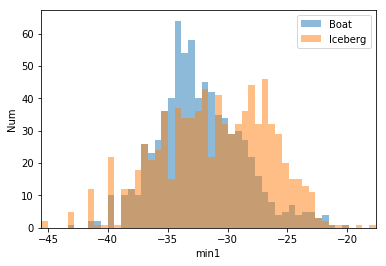

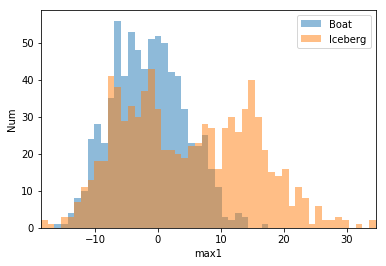

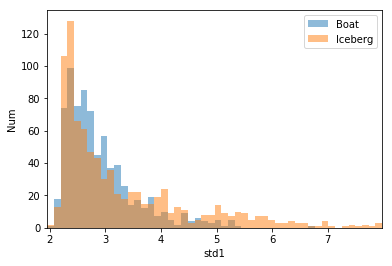

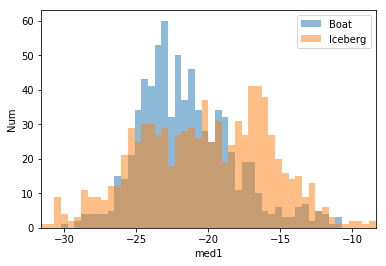

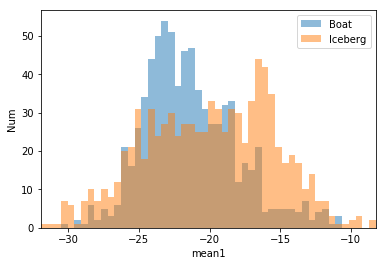

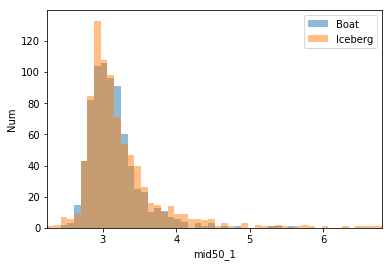

In [17]:
for col in ['min1','max1','std1','med1','mean1','mid50_1']:
    plot_col(train, col)

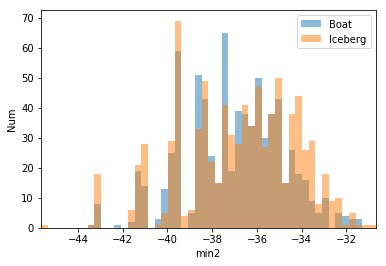

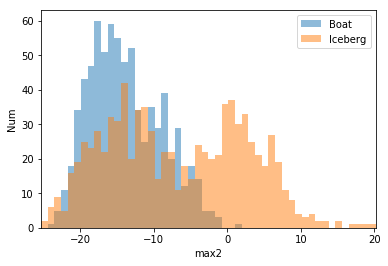

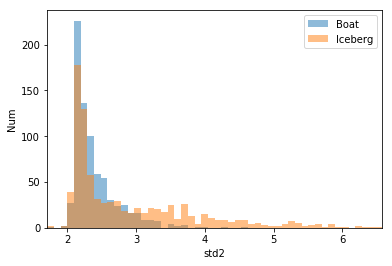

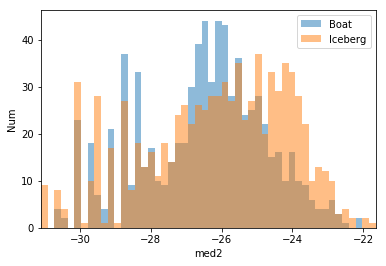

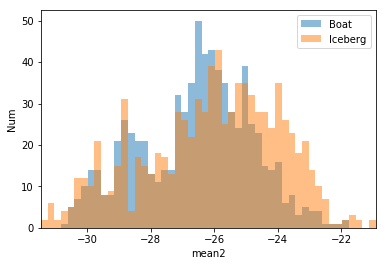

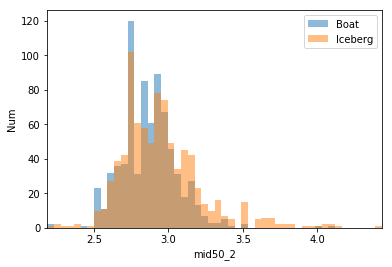

In [18]:
for col in ['min2','max2','std2','med2','mean2','mid50_2']:
    plot_col(train, col)

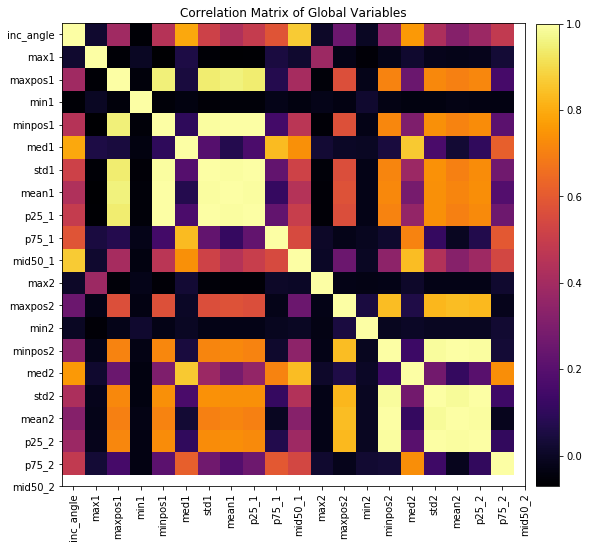

In [19]:
# Just keep the stats without the rest of the data...
train_stats = train.drop(['id','is_iceberg','band_1','band_2'],axis=1)
corr = train_stats.corr()
fig = plt.figure(1, figsize=(10,10))
plt.imshow(corr,cmap='inferno')
labels = np.arange(len(train_stats.columns))
plt.xticks(labels,train_stats.columns,rotation=90)
plt.yticks(labels,train_stats.columns)
plt.title('Correlation Matrix of Global Variables')
cbar = plt.colorbar(shrink=0.85,pad=0.02)
plt.show()

In [22]:
icebergs = train[train.is_iceberg==1].sample(n=9)
ships = train[train.is_iceberg==0].sample(n=9)

##### Showing Random Icebergs using band 1

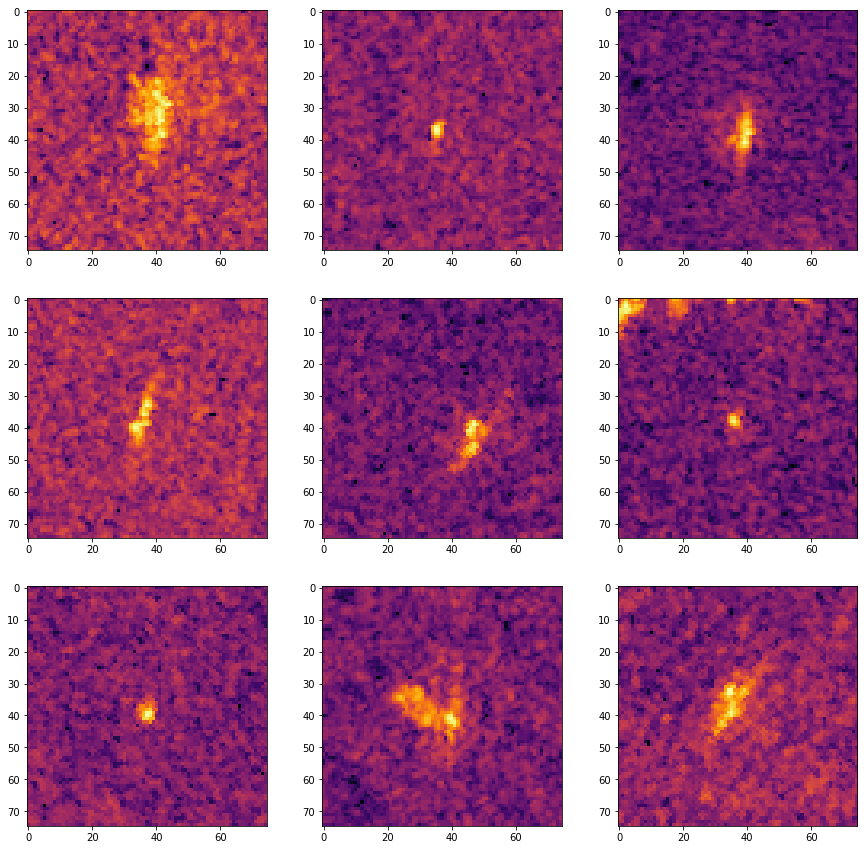

In [23]:
# Plot band_1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,0]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

##### Showing random ships in band 1

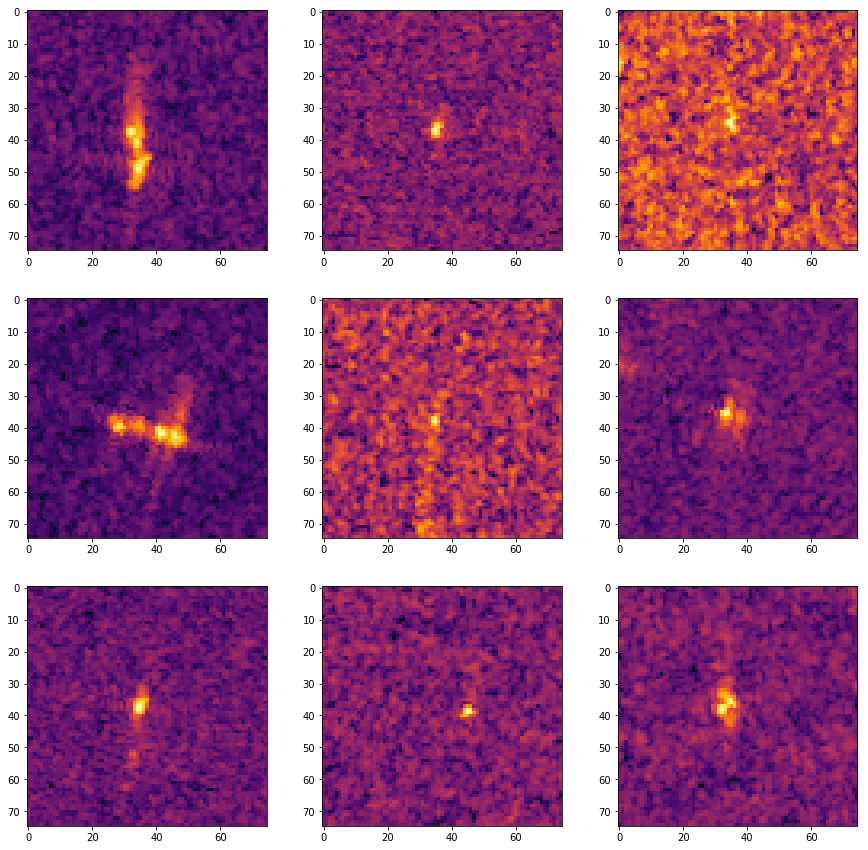

In [24]:
# Plot band_1
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,0]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

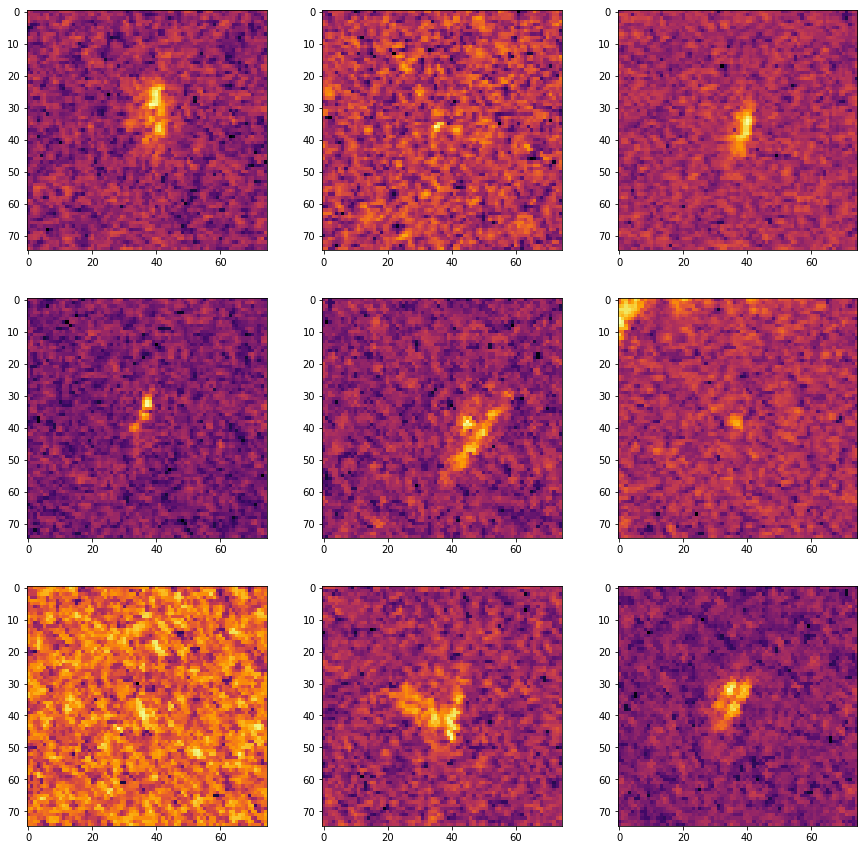

In [26]:
# Plot band_2 - icebergs
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(icebergs.iloc[i,1]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

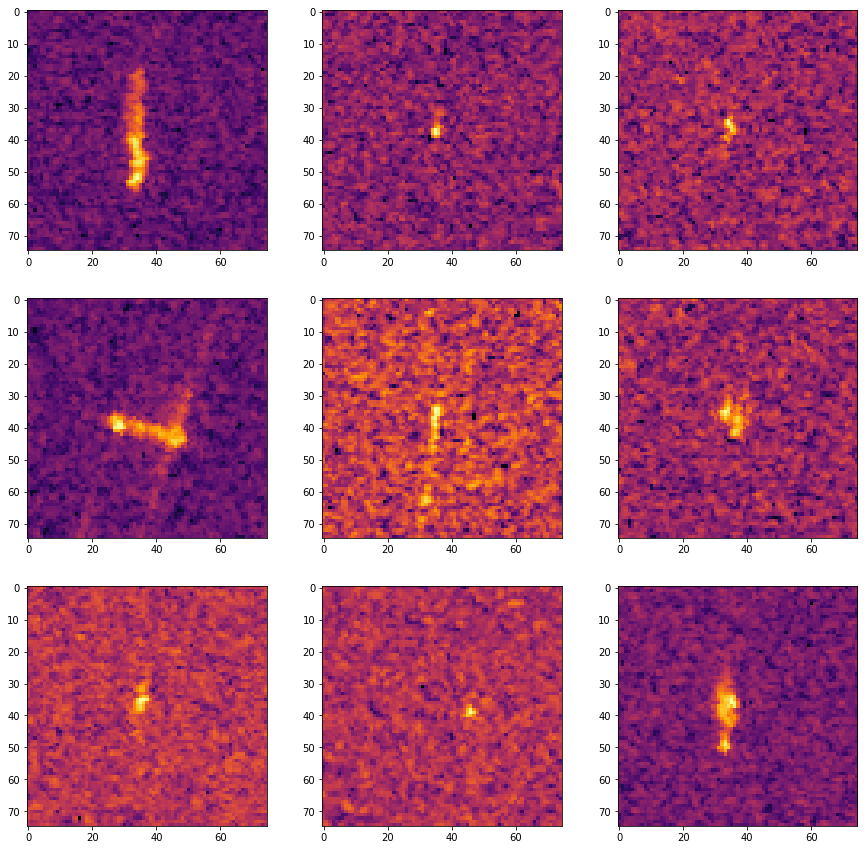

In [27]:
# Plot band_2 - ships
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = np.reshape(np.array(ships.iloc[i,1]),(75,75))
    ax.imshow(arr,cmap='inferno')
    
plt.show()

##### Not too much to tell from any of those blobs...

### Applying Filters

We can pick various 3x3 filters, and then convolve to see what happens to the image.

In [28]:
# Prewitt Edge Detector
prewitt = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
# Sobel Operator
sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
# Smoothing
smooth = np.array([[1, 1, 1],[1, 4, 1],[1, 1, 1]])
# X der
xder = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
# Y der
yder = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
# 2nd X derivative, Y derivative
xder2 = np.array([[-1, 2, -1],[-3, 6, -3],[-1, 2, -1]])
yder2 = np.array([[-1, -3, -1],[2, 6, 2],[-1, -3, -1]])

In [29]:
from scipy import signal

In [35]:
def create_convoluted_images(dataset, convolution, name=''):
    print(name)
    fig = plt.figure(1,figsize=(15,15))
    for i in range(9):
        ax = fig.add_subplot(3,3,i+1)
        arr = signal.convolve2d(np.reshape(np.array(dataset.iloc[i,0]),(75,75)), convolution, mode='valid')
        ax.imshow(arr,cmap='inferno')
        ax.set_title('Smoothed - ' + name)

    plt.show()

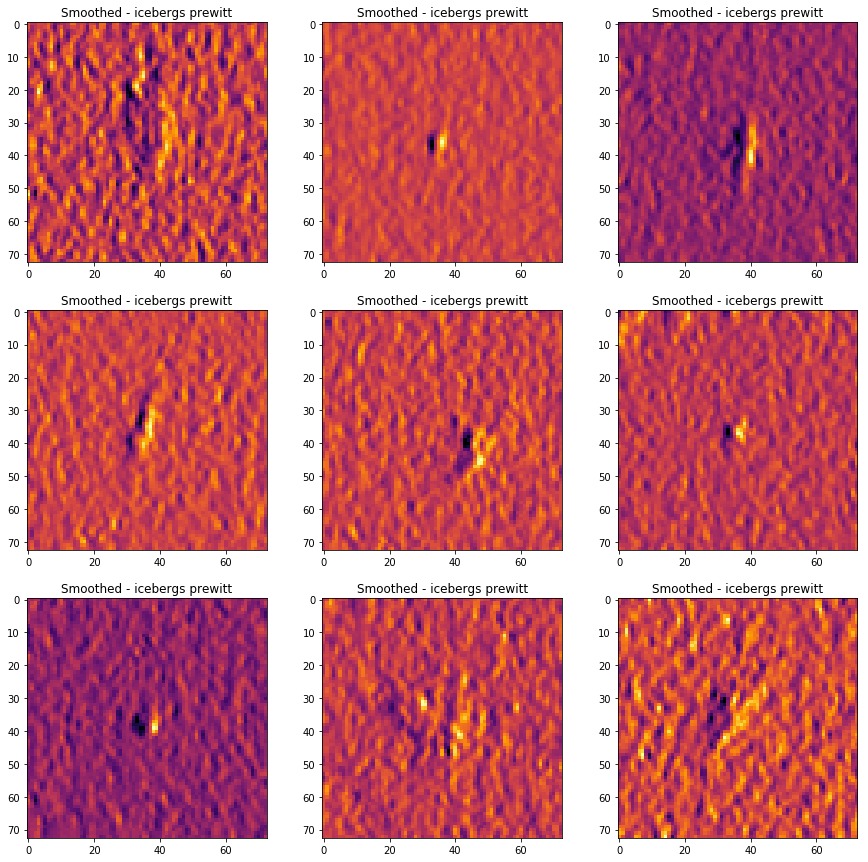

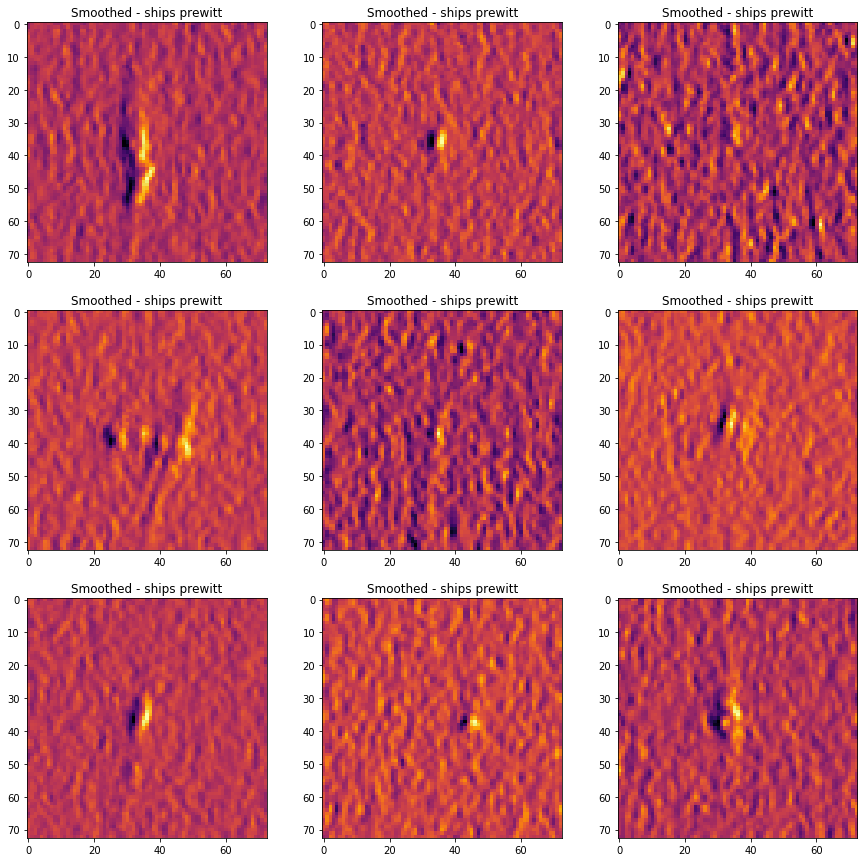

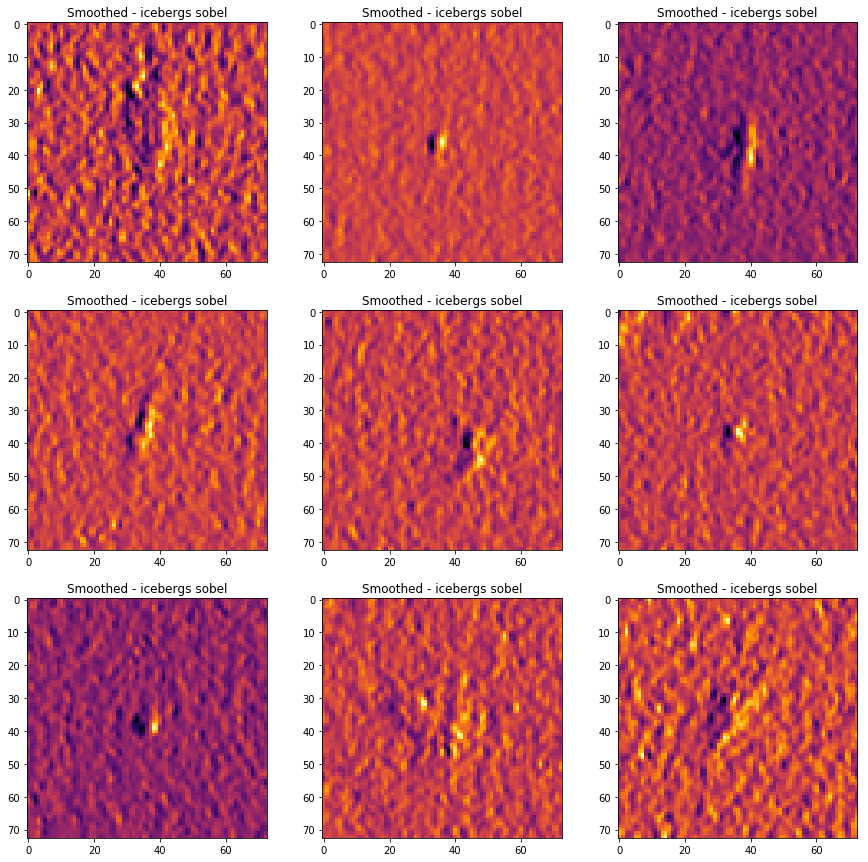

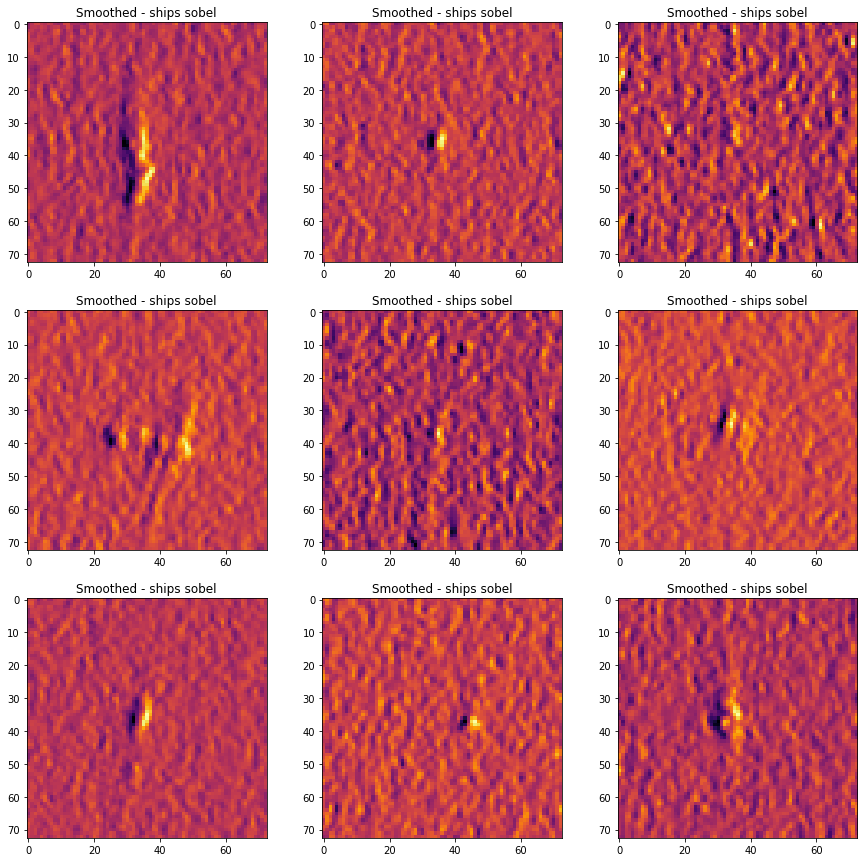

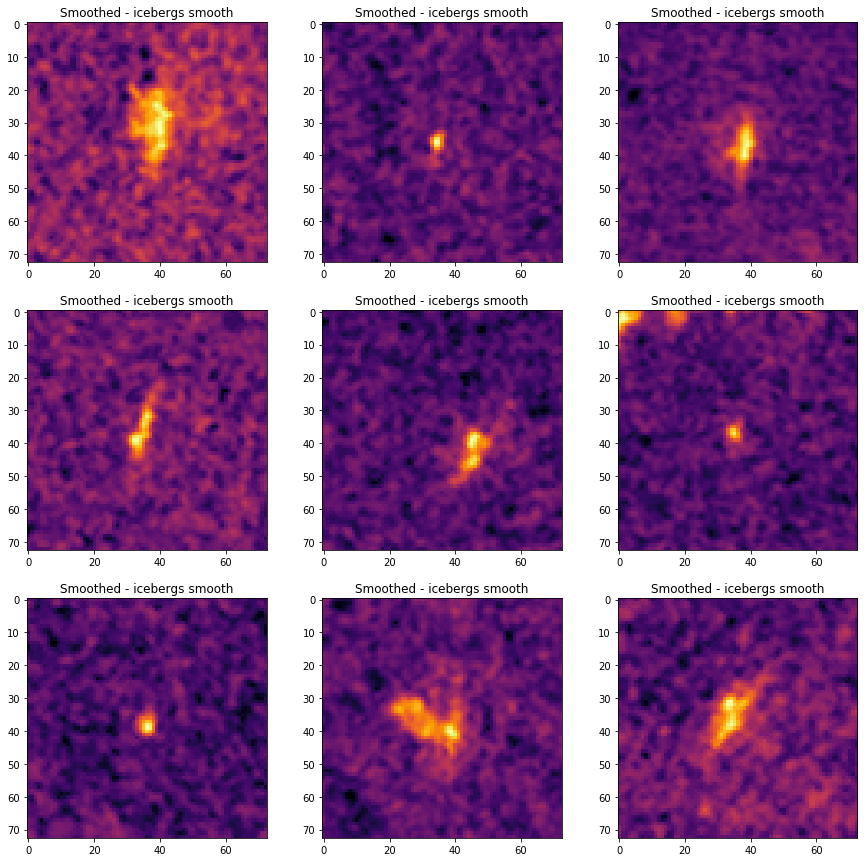

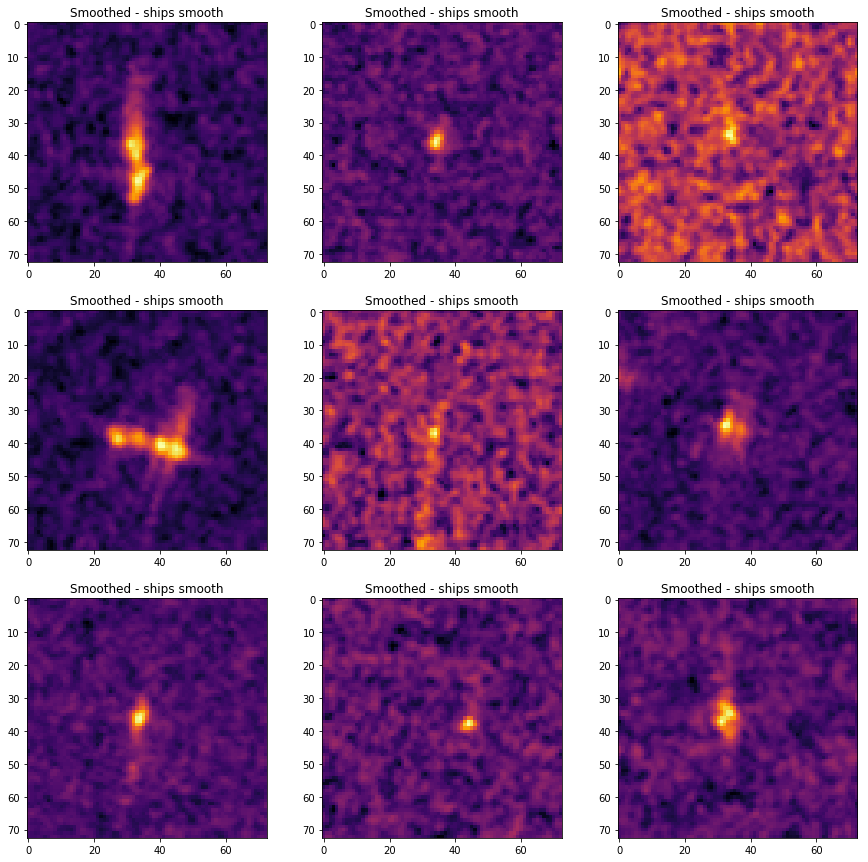

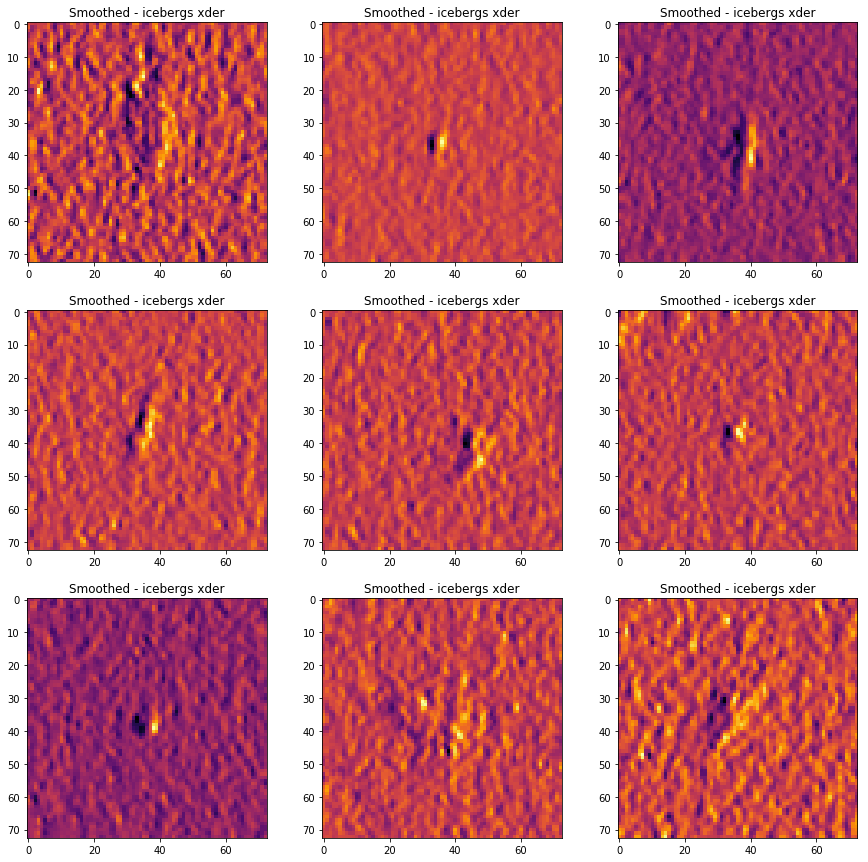

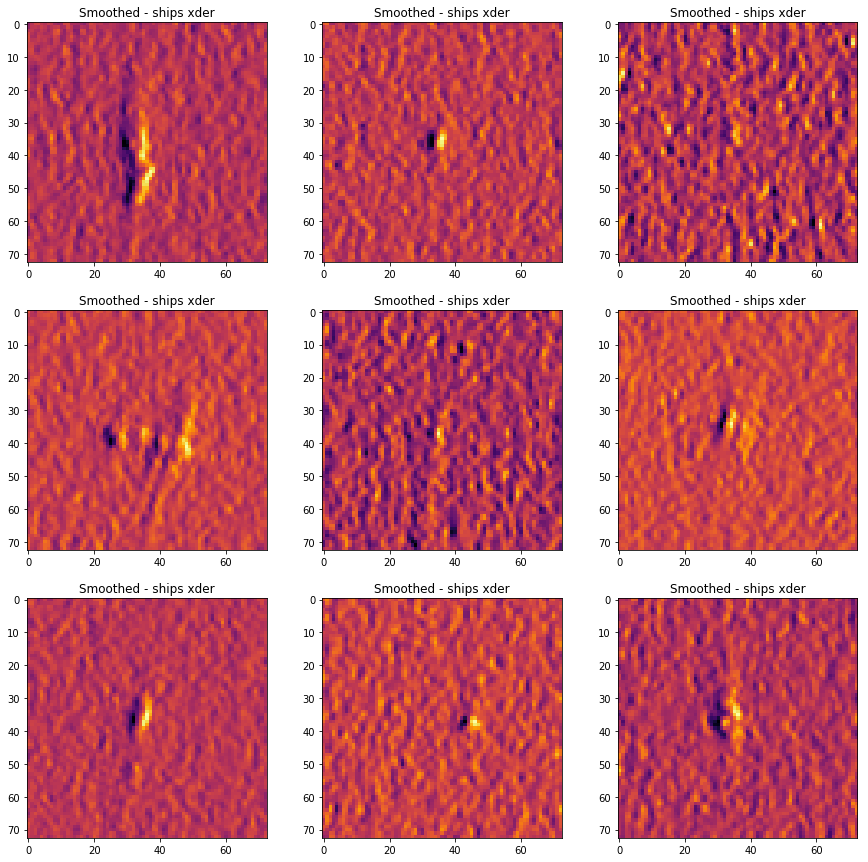

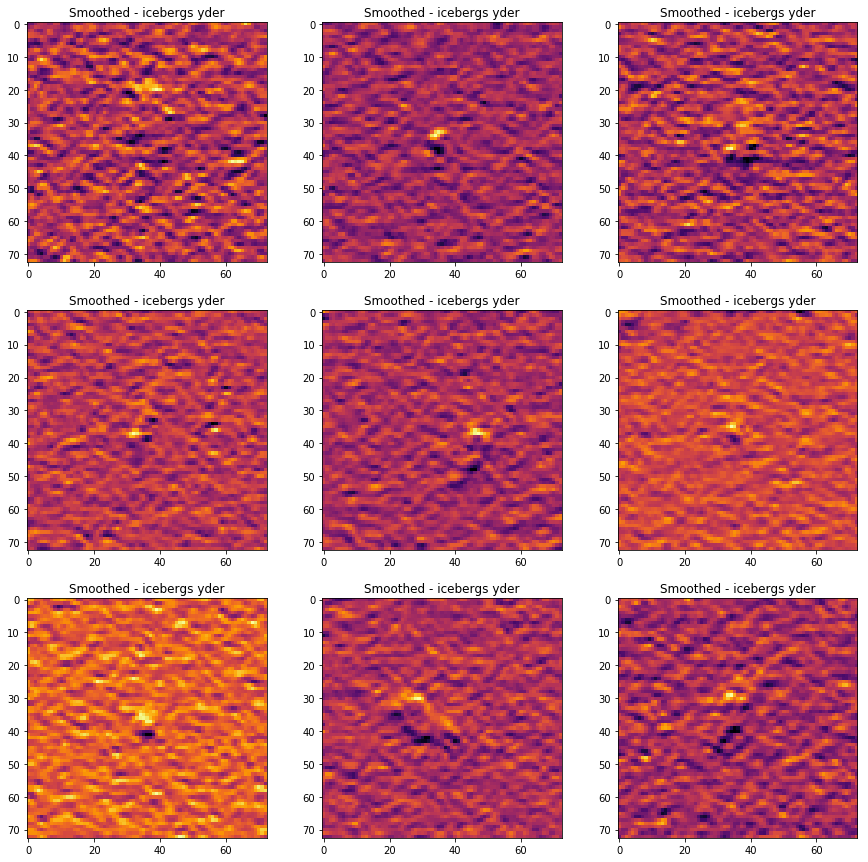

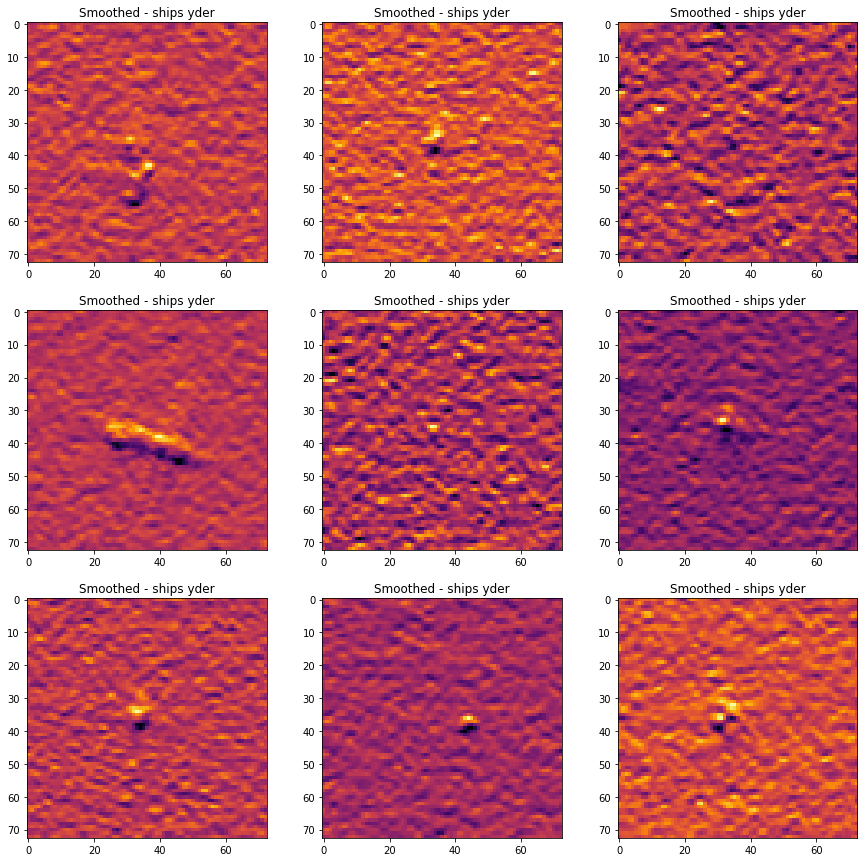

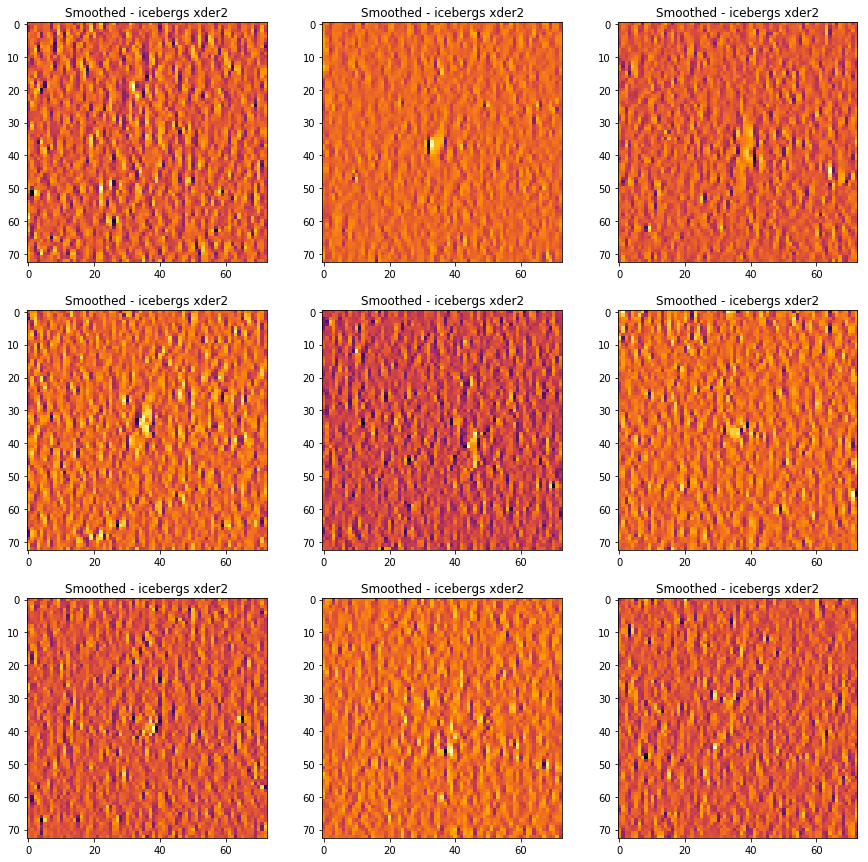

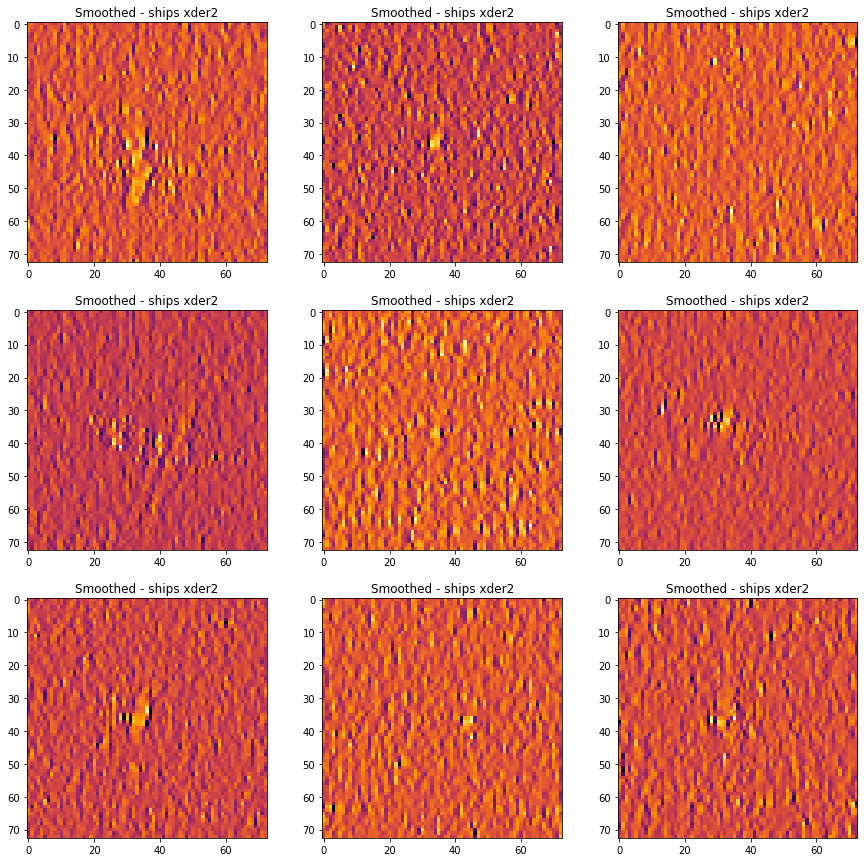

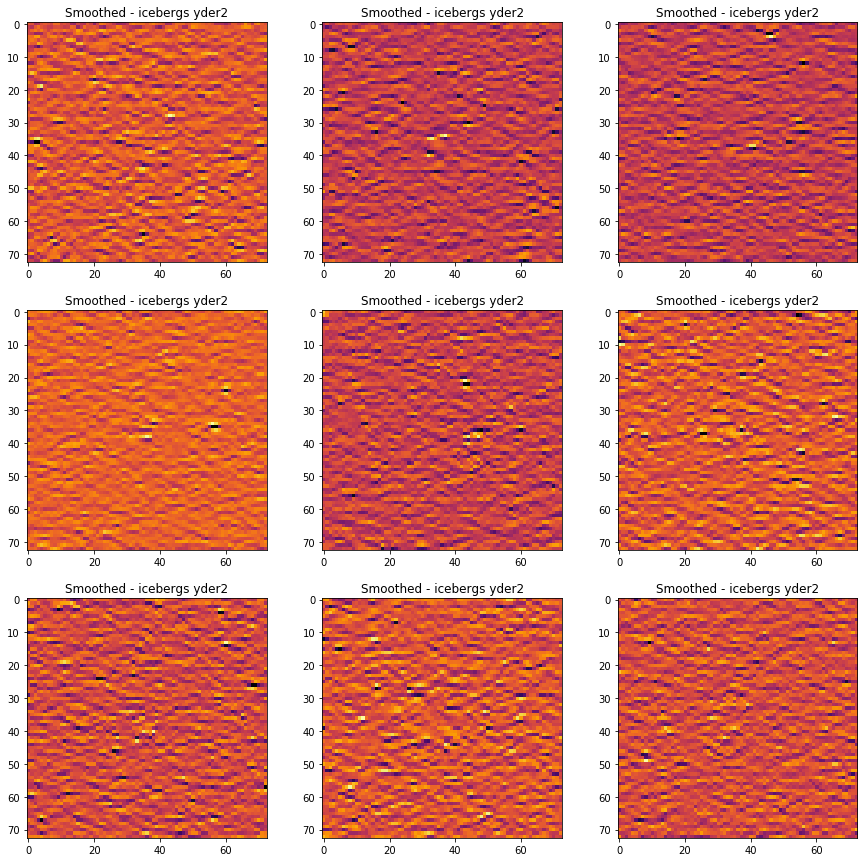

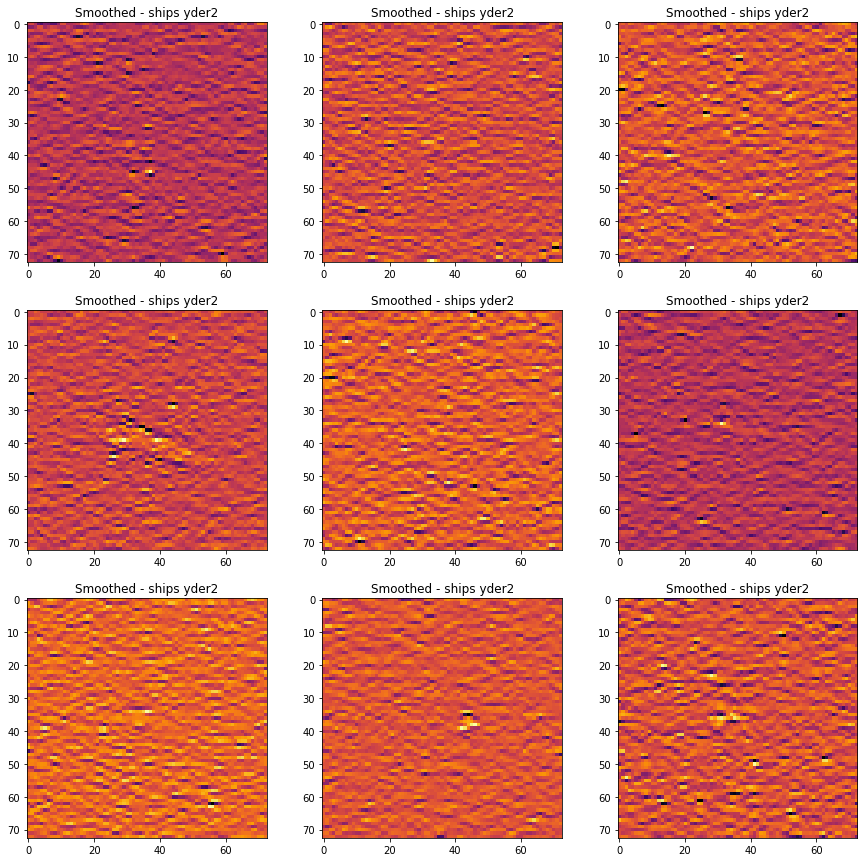

In [38]:
# PREWITT
# icebergs
for kernal in [[prewitt, 'prewitt'], [sobel, 'sobel'], [smooth, 'smooth'], [xder, 'xder'], [yder, 'yder'], [xder2, 'xder2'], [yder2, 'yder2']]:
    create_convoluted_images(icebergs, kernal[0], name='icebergs ' + kernal[1])
    create_convoluted_images(ships, kernal[0], name='ships ' + kernal[1])


_Sobel and Prewitt seem to produce similar results_